In [1]:
import math

# Quantidade de lados

quantidade_de_lados = 5

# Carrega o arquivo shapefile

import geopandas as gpd

gdf = gpd.read_file('C:\\Users\\Estrela\\Desktop\\Método das Bissetrizes\\shapefiles\\poligonos.shp')

# Reprojeta as geometrias para um CRS projetado

gdf = gdf.to_crs(gdf.crs)

from shapely.geometry import LineString

# Separando polígonos de 4 lados
  
gdf_inf = []

for i, row in gdf.iterrows():
       
    # Verifique se a geometria é um polígono com quatro coordenadas (vértices)
    
    if (row['geometry'] is not None and 
        row['geometry'].geom_type == 'Polygon' and 
        len(row['geometry'].exterior.coords) <= quantidade_de_lados):
        gdf_inf.append(row)

# Separando vértices dos polígonos
        
poligonos = []
        
for i, coluna in enumerate(gdf_inf):
    
    # Polígonos
    poligonos.append([])

    for vertice in coluna['geometry'].exterior.coords:

        # Vertices do polígono
        poligonos[i].append((vertice[0], vertice[1]))

In [2]:
import numpy as np
from scipy.spatial import cKDTree

#Importando pontos

# Carrega o arquivo shapefile
gdf_pontos = gpd.read_file('C:\\Users\\Estrela\\Desktop\\Método das Bissetrizes\\shapefiles\\pontos.shp')

# Reprojeta as geometrias para um CRS projetado
gdf_pontos = gdf_pontos.to_crs(gdf_pontos.crs)

pontos_da_rua = []

# Itera sobre os pontos e suas geometrias
for idx, point in gdf_pontos.iterrows():
    if point['geometry'] is not None:
        pontos_da_rua.append((point['geometry'].x, point['geometry'].y))

tree = cKDTree(np.array(pontos_da_rua))
linhas_das_ruas = []

for i in range(len(poligonos)):
    for j in range(len(poligonos[i])-1):
        linhas_das_ruas.append((poligonos[i][j], 
                                list(np.array(pontos_da_rua)[tree.query(poligonos[i][j])[1]])))

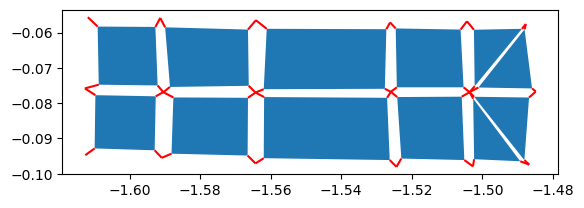

In [3]:
# Alocando linhas das bissetrizes nos polígonos

from shapely.geometry import LineString
       
# Criando objetos LineString a partir das coordenadas
linhas = [LineString(coords) for coords in linhas_das_ruas]

# Criando um novo GeoDataFrame com as linhas
novo_gdf = gpd.GeoDataFrame({"geometry": linhas}, crs=gdf.crs)

# Salve o novo GeoDataFrame como um shapefile
novo_gdf.to_file('C:\\Users\\Estrela\\Desktop\\Método das Bissetrizes\\shapefiles\\novo_shapefile2.shp')

# Plote o shapefile original e as novas linhas
ax = gdf.plot()
novo_gdf.plot(ax=ax, color='red')

# Exiba o gráfico
import matplotlib.pyplot as plt
plt.show()